In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def relu(x, derivative=False):
    if derivative:
        return np.where(x > 0, 1, 0)
    else:
        return np.maximum(0, x)

def leaky_relu(x, alpha=0.01, derivative=False):
    if derivative:
        return np.where(x > 0, 1, alpha)
    else:
        return np.maximum(alpha*x, x)

def tanh(x, derivative=False):
    if derivative:
        return 1 - np.tanh(x)**2
    else:
        return np.tanh(x)

def elu(x, alpha=1.0, derivative=False):
    if derivative:
        return np.where(x > 0, 1, alpha * np.exp(x))
    else:
        return np.where(x > 0, x, alpha * (np.exp(x) - 1))

def linear(x, a = 0.5, derivative=False):
  if derivative:
        a
  else:
        a*x

def sigmoid(x, derivative=False):
    if derivative:
        return sigmoid(x) * (1 - sigmoid(x))
    else:
        return 1 / (1 + np.exp(-x))

In [ ]:
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, hidden_activn, output_activn):
        self.v = np.random.randn(input_size, hidden_size)
        self.v0 = np.zeros((1, hidden_size))
        self.w = np.random.randn(hidden_size, output_size)
        self.w0 = np.zeros((1, output_size))
        self.z_fn = hidden_activn
        self.y_fn = output_activn

    def forward(self, X):
        Z = self.z_fn(np.dot(X, self.v) + self.v0)
        Y = self.y_fn(np.dot(Z, self.w) + self.w0)
        return Y

    def backward(self, X, Y_true, Y_pred, LR):
        delta_k = (Y_true - Y_pred) * self.y_fn(Y_pred, derivative=True)
        delta_in_j = np.dot(delta_k, self.w.T)
        delta_j = delta_in_j * self.z_fn(np.dot(X, self.v) + self.v0, derivative=True)

        self.w += LR * np.dot(self.z_fn(np.dot(X, self.v) + self.v0).T, delta_k)
        self.w0 += LR * np.sum(delta_k, axis=0, keepdims=True)

        self.v += LR * np.dot(X.T, delta_j)
        self.v0 += LR * np.sum(delta_j, axis=0, keepdims=True)

In [ ]:
LR = 1
epochs = 20000

input_size = 2
hidden_size = 2
output_size = 1

# Initialize weights and biases
V = np.random.normal(scale=0.5, size=(input_size, hidden_size))
W = np.random.normal(scale=0.5, size=(hidden_size, output_size))
V0 = np.random.normal(scale=0.5, size=(1, hidden_size))
W0 = np.random.normal(scale=0.5, size=(1, output_size))

In [ ]:
# Sample input and output
X = np.array([[0.4, -0.7],
              [0.3, -0.5],
              [0.6, 0.1],
              [0.2, 0.4]])

Y = np.array([[0.1],
              [0.5],
              [0.3],
              [0.25]])

In [ ]:
def mean_squared_error(y_pred, y_true):
    return ((y_pred - y_true)**2).sum() / (2*y_pred.size)

Final MSE for relu: 0.0025000000000000005
Y_pred:
 [[0.1 ]
 [0.4 ]
 [0.4 ]
 [0.25]]

Final MSE for leaky_relu: 3.043210053374881e-31
Y_pred:
 [[0.1 ]
 [0.5 ]
 [0.3 ]
 [0.25]]

Final MSE for tanh: 8.77549979160044e-31
Y_pred:
 [[0.1 ]
 [0.5 ]
 [0.3 ]
 [0.25]]

Final MSE for elu: 1.0000015934850958e-13
Y_pred:
 [[0.09999977]
 [0.49999924]
 [0.29999984]
 [0.24999962]]

Final MSE for sigmoid: 1.4515758064970901e-29
Y_pred:
 [[0.1 ]
 [0.5 ]
 [0.3 ]
 [0.25]]



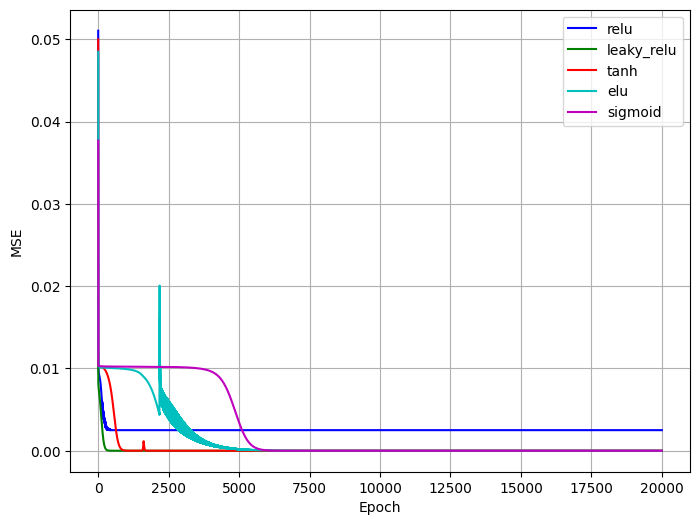

In [ ]:
plt.figure(figsize=(8, 6))

hidden_activations = [relu, leaky_relu, tanh, elu, sigmoid]
colors = ['b', 'g', 'r', 'c', 'm']

for i, hidden_activation in enumerate(hidden_activations):
  model = NeuralNetwork(input_size, hidden_size, output_size, hidden_activation, sigmoid)
  mse = []

  for epoch in range(epochs):
    # Forward pass
    Y_pred = model.forward(X)
    mse.append(mean_squared_error(Y_pred, Y))
    # Backpropagation
    model.backward(X, Y, Y_pred, LR)

  print(f"Final MSE for {hidden_activation.__name__}:", mse[-1])
  print(f"Y_pred:\n", Y_pred)
  print()

  plt.plot(range(epochs), mse, label=hidden_activation.__name__, color=colors[i])
  plt.xlabel("Epoch")
  plt.ylabel("MSE")

plt.legend()
plt.grid(True)
plt.show()